<a href="https://colab.research.google.com/github/MarcoXM/ComputerVision/blob/master/How_to_use_tensorflow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to get into Colab Notebook!
## Enter : colab.research.google.com  in your Chrome.


In [1]:
'''
import tensorflow as tf
tf.__version__
'''
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.0.0-rc0'

### 1.What is tensor

In [0]:
d1 = tf.ones((2,))
d2 = tf.ones((2,2))
d3 = tf.ones((2,2,2))
d4 = tf.ones((2,2,2,2))

In [5]:
print(f'The tensor is \n {d1}. \n')
print(f'The tensor is \n {d2}. \n')
print(f'The tensor is \n {d3}. \n')
print(f'The tensor is \n {d4}. \n')


The tensor is 
 [1. 1.]. 

The tensor is 
 [[1. 1.]
 [1. 1.]]. 

The tensor is 
 [[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]]. 

The tensor is 
 [[[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]


 [[[1. 1.]
   [1. 1.]]

  [[1. 1.]
   [1. 1.]]]]. 



### 2.Basic operation - eager execution

In [8]:
from tensorflow import constant,ones_like,multiply


#Initial a constant
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
# It is not matrix multiplication!
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print(f'The tensor is \n {C1}')
print(f'The tensor is \n {C23}')

The tensor is 
 [1 2 3 4]
The tensor is 
 [[1 2 3]
 [1 6 4]]


### 3.Import the packages we will use in model and Random state setting:


In [0]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Activation
from tensorflow.keras import Sequential
from tensorflow.keras import utils # for categorical labels
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%notebook inline

# Make our result reproducible!
def seed_everything(seed):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

In [0]:
seed_everything(6000)

### 4.Data Generation and visualization
Here we would generate some fake data, and I believe with this kinds of simple fake data, you can get better understood how our model works.

In [0]:

data_shape = (500, #500 data points
             2) # 2 features
x1 = np.random.normal(0,1,data_shape)+1.5
x2 = -np.random.normal(0,1,data_shape)-1.5
y1 = np.zeros(500) # 500 data labeled by 0
y2 = np.ones(500) # 500 data labeled by 1


# Combine thses datapoint in
x = np.concatenate([x1,x2],
                   axis = 0) # concate in the first dimenssion
y = np.concatenate([y1,y2])



In [36]:
x.shape,y.shape

((1000, 2), (1000,))

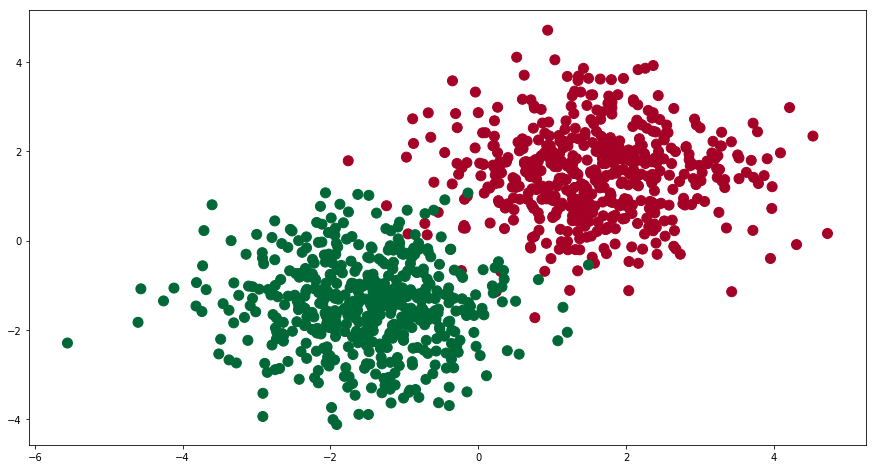

In [37]:
plt.figure(figsize=(15,8))
plt.scatter(x[:, 0], x[:, 1],
            c=y, # color depends on its label
            s=100, # size
            cmap='RdYlGn' # Yes(1) would be red and 0 would be green
           )
plt.show()

In [0]:
# 700 points for training and 300 for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

ytrian_keras = utils.to_categorical(y,2) # keras needs one-hot input label


### 5.Model Building Mid Level Solution

In [39]:
model = Sequential() # initialize a model container to hold the layers
model.add(Dense(units=1, # How many nodes in this layers
                input_dim = x.shape[1], # the number of input data features
               activation = 'sigmoid' 
               ))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary() 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 668us/sample - loss: 0.4535 - accuracy: 0.8400
Epoch 2/2
700/700 [==============================] - 0s 54us/sample - loss: 0.3677 - accuracy: 0.9100


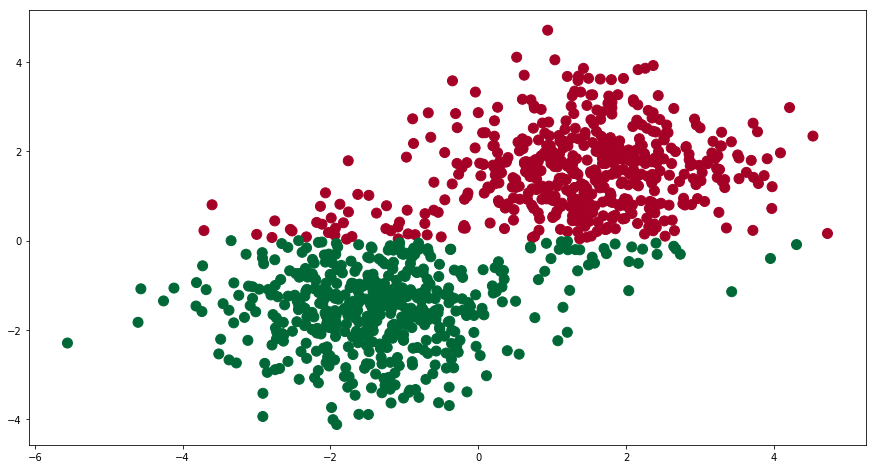

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 53us/sample - loss: 0.3110 - accuracy: 0.9429
Epoch 2/2
700/700 [==============================] - 0s 45us/sample - loss: 0.2711 - accuracy: 0.9571


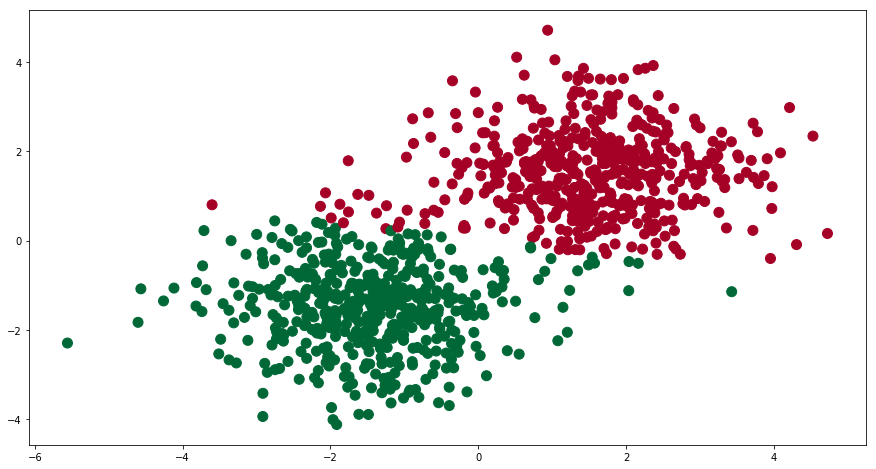

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 55us/sample - loss: 0.2417 - accuracy: 0.9657
Epoch 2/2
700/700 [==============================] - 0s 46us/sample - loss: 0.2191 - accuracy: 0.9743


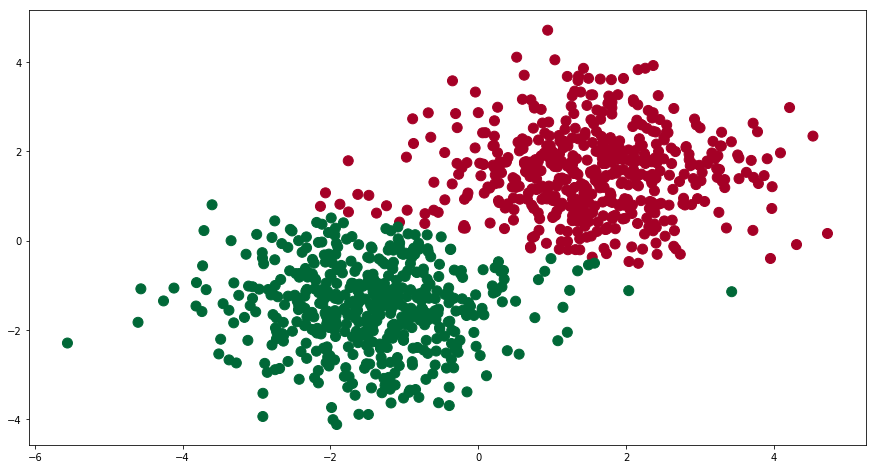

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 56us/sample - loss: 0.2012 - accuracy: 0.9743
Epoch 2/2
700/700 [==============================] - 0s 50us/sample - loss: 0.1867 - accuracy: 0.9771


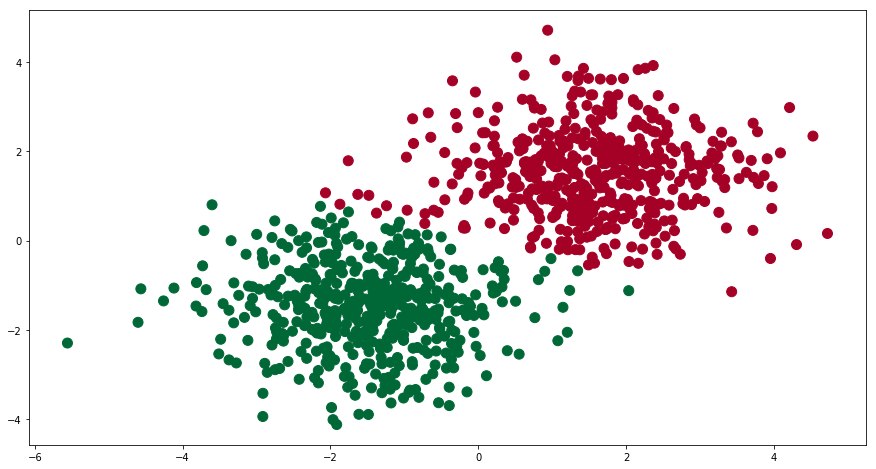

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 53us/sample - loss: 0.1747 - accuracy: 0.9786
Epoch 2/2
700/700 [==============================] - 0s 45us/sample - loss: 0.1646 - accuracy: 0.9814


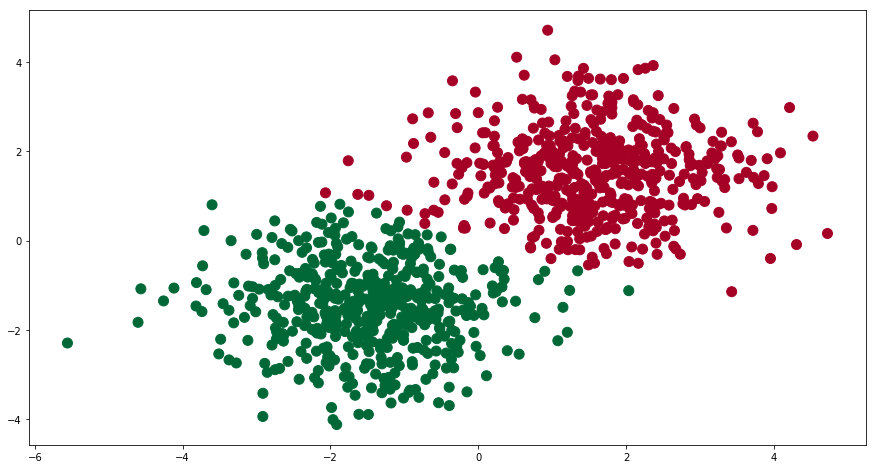

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 85us/sample - loss: 0.1559 - accuracy: 0.9814
Epoch 2/2
700/700 [==============================] - 0s 45us/sample - loss: 0.1484 - accuracy: 0.9814


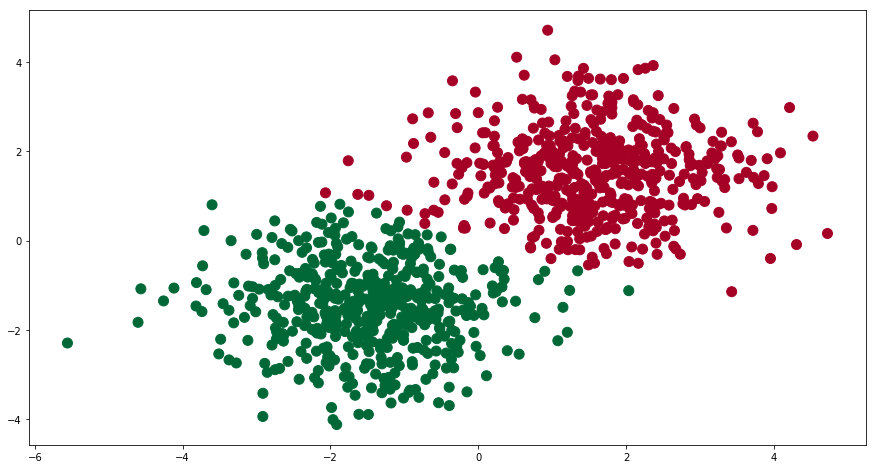

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 59us/sample - loss: 0.1419 - accuracy: 0.9814
Epoch 2/2
700/700 [==============================] - 0s 46us/sample - loss: 0.1361 - accuracy: 0.9829


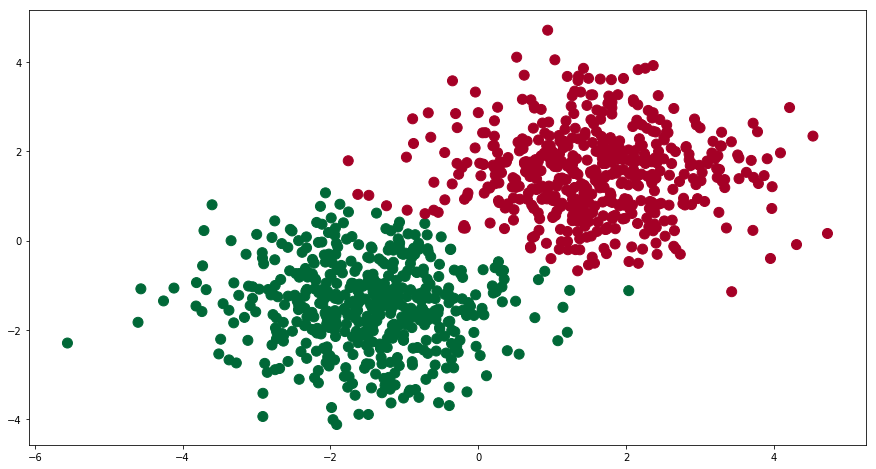

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 66us/sample - loss: 0.1310 - accuracy: 0.9829
Epoch 2/2
700/700 [==============================] - 0s 47us/sample - loss: 0.1264 - accuracy: 0.9843


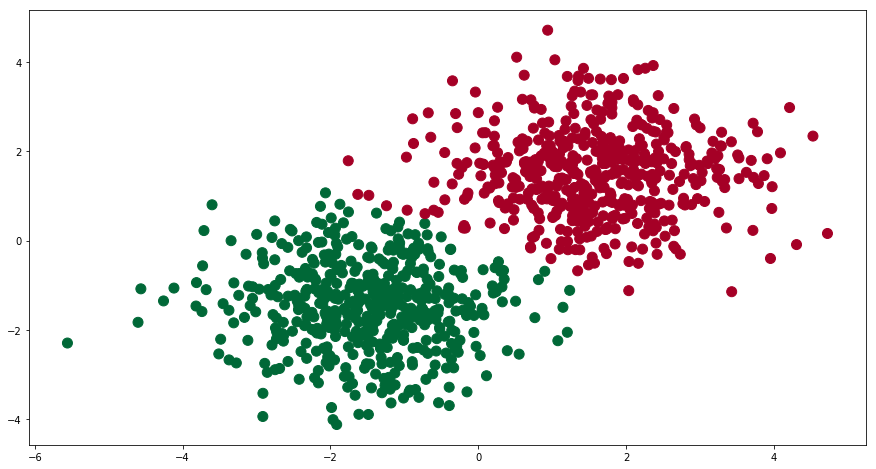

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 57us/sample - loss: 0.1222 - accuracy: 0.9843
Epoch 2/2
700/700 [==============================] - 0s 45us/sample - loss: 0.1184 - accuracy: 0.9843


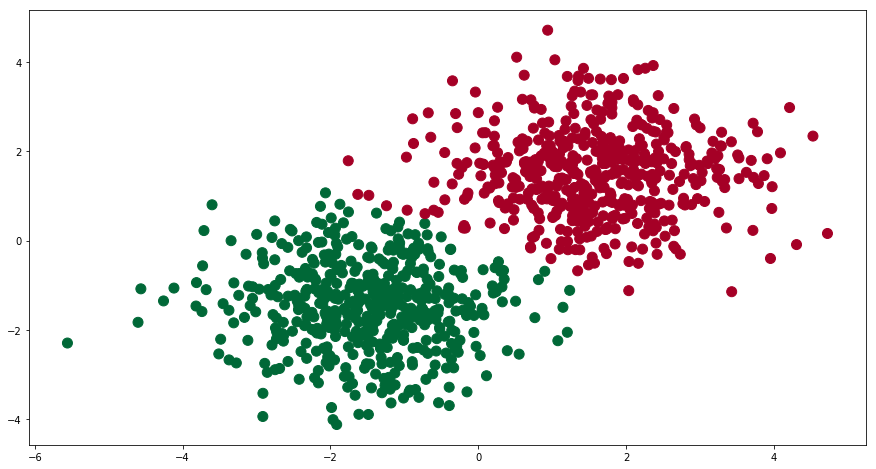

Train on 700 samples
Epoch 1/2
700/700 [==============================] - 0s 64us/sample - loss: 0.1150 - accuracy: 0.9843
Epoch 2/2
700/700 [==============================] - 0s 48us/sample - loss: 0.1119 - accuracy: 0.9843


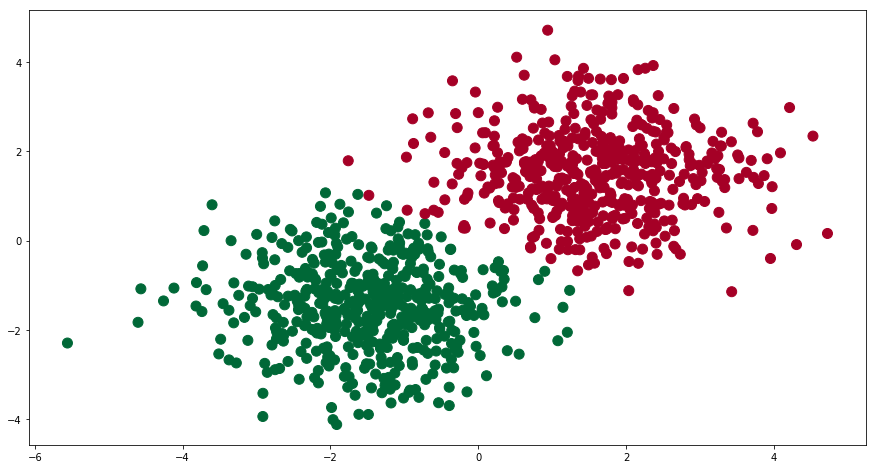

In [40]:
# Training
for i in range(10):
    model.fit(x_train, y_train, epochs=2, batch_size=32)
    y_pred = model.predict_classes(x)
    plt.figure(figsize=(15,8))
    plt.scatter(x[:, 0], x[:, 1], c=y_pred.ravel(), s=100, cmap='RdYlGn')
    plt.show()

#### Evaluation

In [41]:
# Evaluate our keras model score

y_pred_keras = model.predict_classes(x_test)
confusion_matrix(y_true=y_test,y_pred=y_pred_keras)

array([[154,   3],
       [  3, 140]])

### 6.Low-Level Solution

In [0]:
### Data to tensor
x_tensor = tf.cast(x_train,dtype=tf.float32)
y_tensor = tf.cast(y_train,dtype=tf.int32)

### Parameters initial
w = tf.Variable([[0.1],[-0.1]],
                dtype=tf.float32)
b = tf.Variable(0.1,# initial bias is 0.1
                dtype=tf.float32)

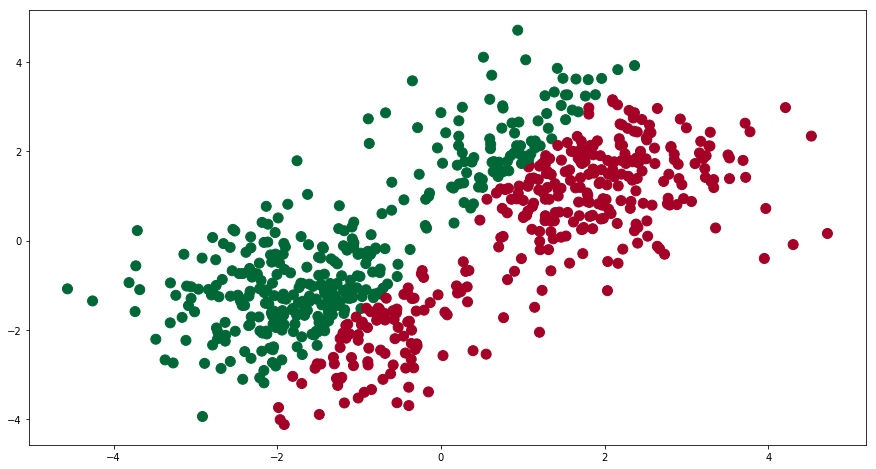

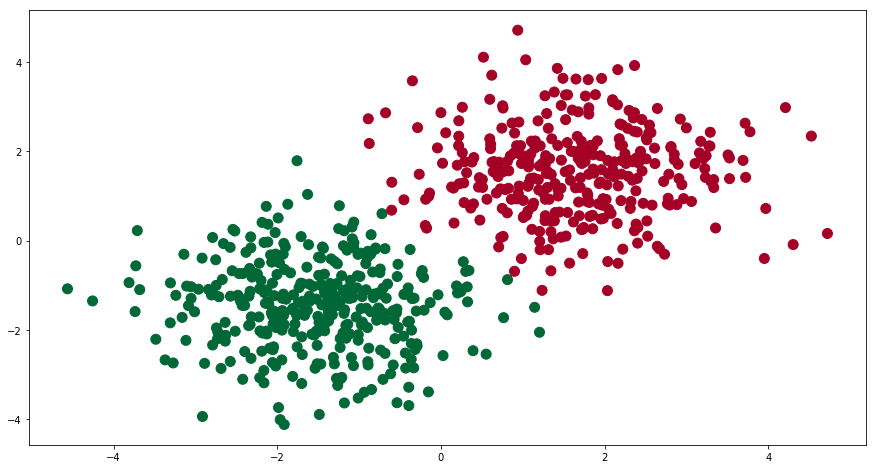

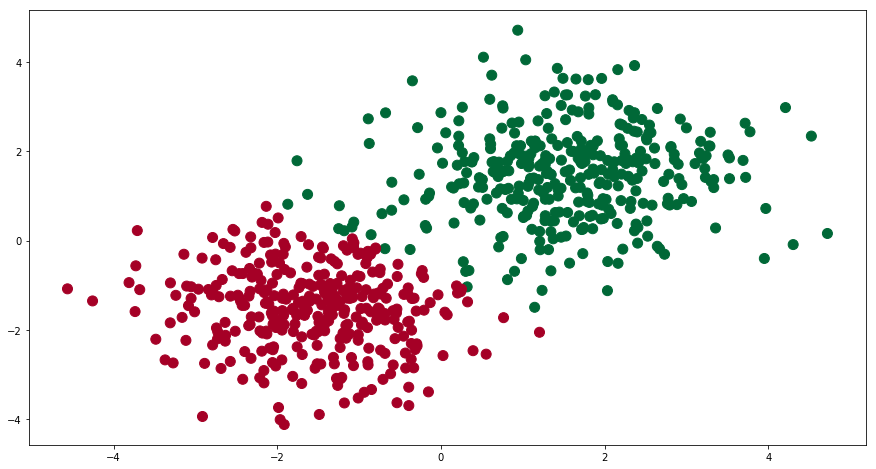

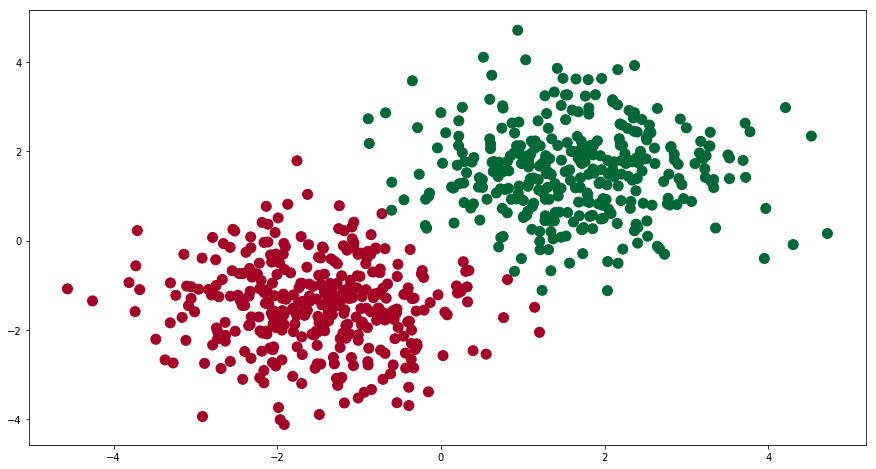

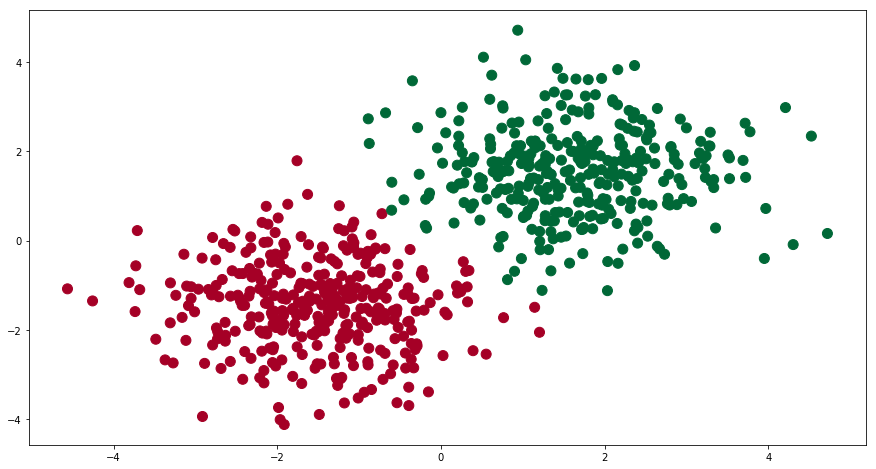

In [43]:
def model(w,x,b):
    return keras.activations.sigmoid(tf.matmul(x,w) + b)

def loss_function(w,x,b,target = y_tensor):
    y_pred = model(w,x,b)
    return keras.losses.binary_crossentropy(target,y_pred)

def predict_class(w,x,b):
    y_pred = keras.activations.sigmoid(tf.matmul(x,w) + b)
    return [1 if i > 0.5 else 0 for i in y_pred]
    
opt = keras.optimizers.SGD()

for j in range(10):
    opt.minimize(lambda: loss_function(w,x_tensor,b,y_tensor), var_list=[w,b])
    if j%2 == 0:
        
        y_pro = model(w,x_tensor,b).numpy()
        y_pred = [1 if i >0.5 else 0 for i in y_pro]
        plt.figure(figsize=(15,8))
        plt.scatter(x_tensor.numpy()[:, 0], x_tensor.numpy()[:, 1], c=y_pred, s=100, cmap='RdYlGn')
        plt.show()



#### Evaluateion


In [44]:
#Evaluate our low level API score

#transform our testing data into tensor 
x_tensor_test = tf.cast(x_test,dtype=tf.float32)
y_tensor_test = tf.cast(y_test,dtype=tf.int32)
y_pred_low = predict_class(w,x_tensor_test,b)

confusion_matrix(y_true=y_test,y_pred=y_pred_low)


array([[139,  18],
       [  0, 143]])

### 7.High Level

In [0]:
from tensorflow import estimator

# Define the feature col for the data
x_col = tf.feature_column.numeric_column('x',shape=(2,))## column for x data

feature_list = [x_col] 

In [48]:


def input_fn(): # defint input function
	# Define the labels
	labels = y_train
	# Define the features
	features = {'x':x_train, 
               }
	return features, labels

model_high = estimator.LinearClassifier(feature_columns=feature_list) #initializing our model
model_high.train(input_fn, steps=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpy9kitldi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd107f6c3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely 

#### Evaluation

In [49]:
def input_fn_test(): # defint input function
	# Define the labels
	labels = y_test
	# Define the features
	features = {'x':x_test, 
               }
	return features, labels

eval_result = model_high.predict(input_fn_test)# model class

y_pred_high = []
for i,_ in zip(eval_result,range(300)): # if we directly unpack it without related range() function, it would run forever!
    #print(i)
    y_pred_high.append(i['class_ids'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpy9kitldi/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


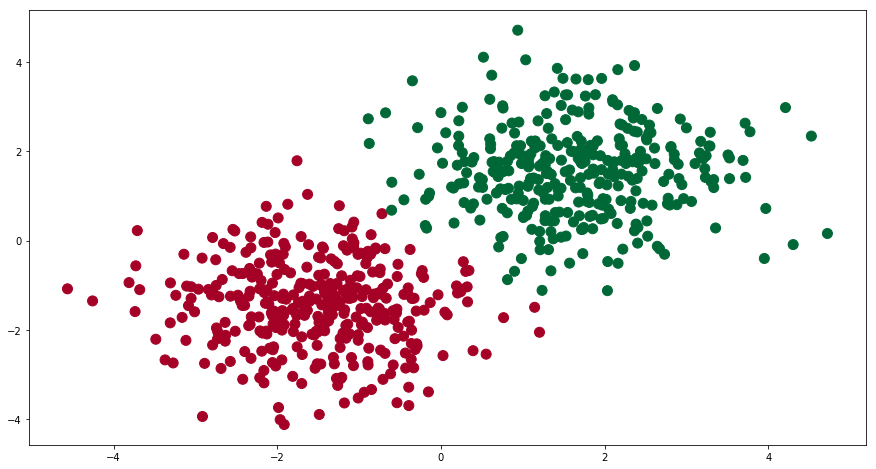

In [50]:
plt.figure(figsize=(15,8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=np.array(y_pred).flatten(), s=100, cmap='RdYlGn')
plt.show()

In [51]:
confusion_matrix(y_true=y_test,y_pred=y_pred_high)

array([[154,   3],
       [  1, 142]])